In [9]:
# imported Fashion Mnist library from Tensorflow and keras
from tensorflow.keras.datasets.fashion_mnist import  load_data
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# data set containes 60000 train images and 10000 test images of size 28 *28

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

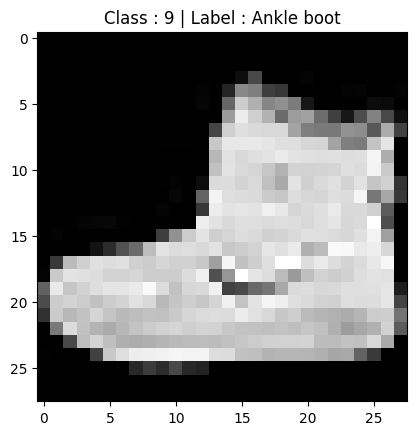

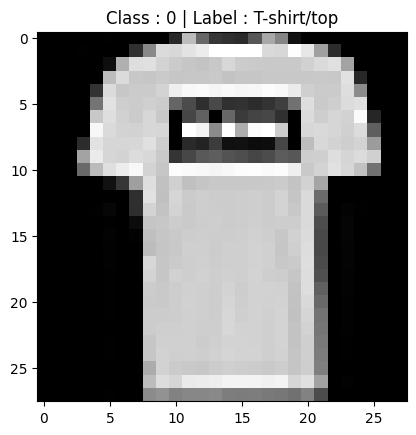

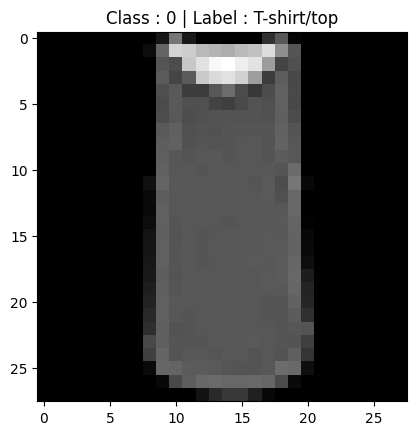

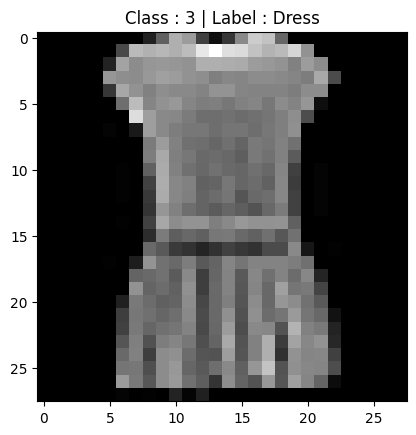

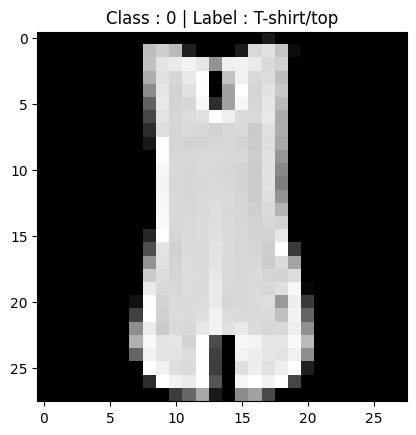

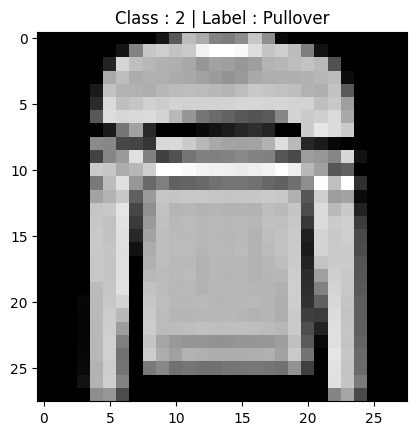

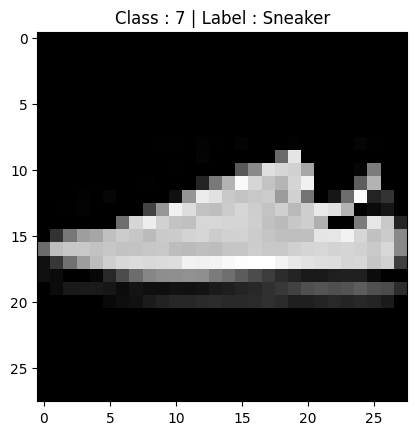

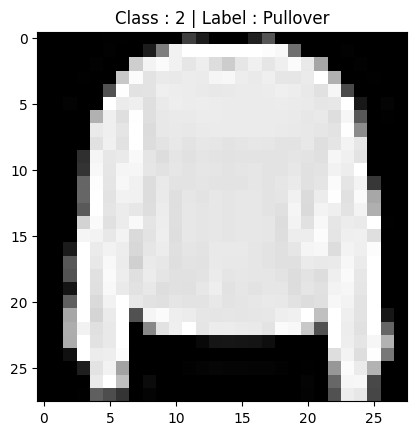

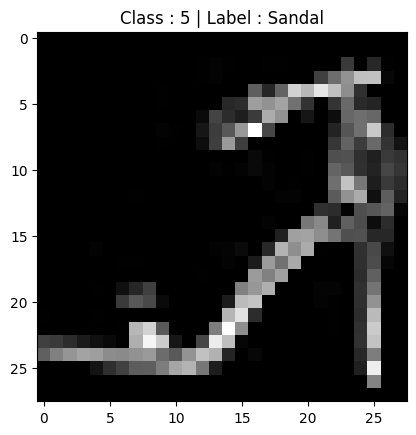

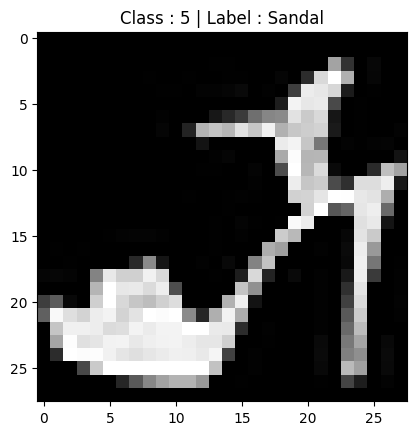

In [8]:
# displaying the training few images of dataset with y_train result.
for i in range(10):
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Class : {str(y_train[i])} | Label : {class_names[y_train[i]]}")
    plt.show()

### Data Preparation

In [11]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
'''
Input Dataset for ConvNets needs to be a 4D array
(n, x, y, c)

n - #Images, size of data/batch
x, y - Size of the image (pixels Height and pixel width)
c - #Channels (RGB = 3, Grayscale = 1)
'''

In [22]:
x_train.dtype

dtype('uint8')

In [23]:
x_train = x_train.reshape(60000, 28, 28, 1).astype(float)
x_test = x_test.reshape(10000, 28, 28, 1).astype(float)

In [24]:
print(x_train.shape)
print(y_train_ohe.shape)
print(x_test.shape)
print(y_test_ohe.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


### Model Building

- Increase the LR or Train for Longer increase epochs
- Add more conv layers
- #Kernels
- Size of the Kernel
- If Overfitting
    - Dropout
    - Regularizers
- Normalize / Min Max scaling data

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, Activation, Flatten

In [26]:
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(5,5), strides=(1,1), padding="valid"))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [27]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [69]:
model.fit(x=x_train, 
          y=y_train_ohe,
          batch_size=1000,
          validation_data=(x_test, y_test_ohe),
          epochs=10)

Epoch 1/10
60/60 [==============================] - 5s 78ms/step - loss: 0.3939 - accuracy: 0.8680 - val_loss: 0.4846 - val_accuracy: 0.8481
Epoch 2/10
60/60 [==============================] - 5s 81ms/step - loss: 0.3862 - accuracy: 0.8712 - val_loss: 0.4748 - val_accuracy: 0.8492
Epoch 3/10
60/60 [==============================] - 5s 83ms/step - loss: 0.3817 - accuracy: 0.8711 - val_loss: 0.4681 - val_accuracy: 0.8519
Epoch 4/10
60/60 [==============================] - 5s 86ms/step - loss: 0.3768 - accuracy: 0.8733 - val_loss: 0.4597 - val_accuracy: 0.8514
Epoch 5/10
60/60 [==============================] - 5s 85ms/step - loss: 0.3719 - accuracy: 0.8734 - val_loss: 0.4562 - val_accuracy: 0.8508
Epoch 6/10
60/60 [==============================] - 5s 83ms/step - loss: 0.3677 - accuracy: 0.8749 - val_loss: 0.4587 - val_accuracy: 0.8513
Epoch 7/10
60/60 [==============================] - 5s 85ms/step - loss: 0.3682 - accuracy: 0.8739 - val_loss: 0.4524 - val_accuracy: 0.8543
Epoch 8/10
60

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (1000, 24, 24, 3)         78        
_________________________________________________________________
activation_1 (Activation)    (1000, 24, 24, 3)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (1000, 12, 12, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (1000, 432)               0         
_________________________________________________________________
dense_1 (Dense)              (1000, 10)                4330      
Total params: 4,408
Trainable params: 4,408
Non-trainable params: 0
_________________________________________________________________


In [29]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

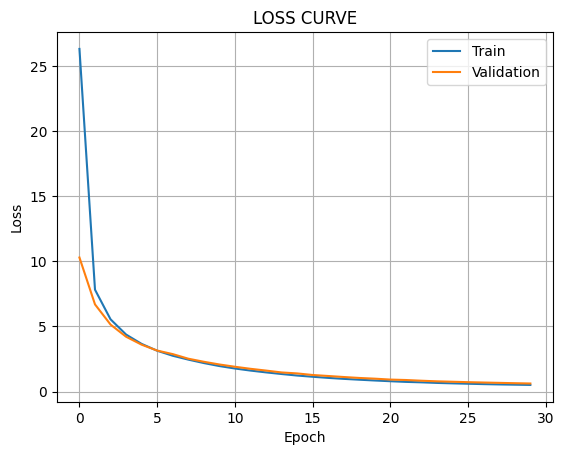

In [30]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

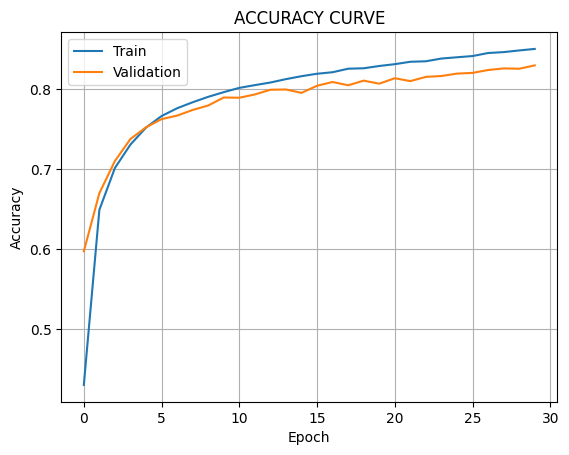

In [31]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

### Predictions

In [33]:
import numpy as np

In [70]:
preds = model.predict(x_test)

In [71]:
preds.shape

(10000, 10)

array([4871, 4301, 5086, 1732, 8565, 1268, 9058, 1274, 1063, 4735])

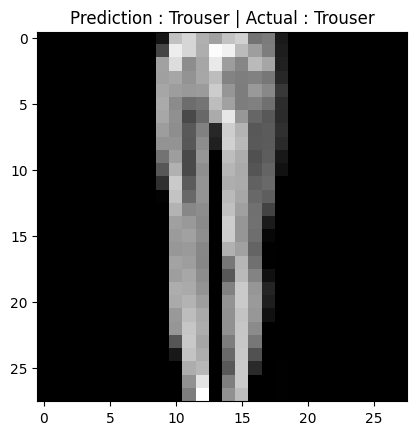

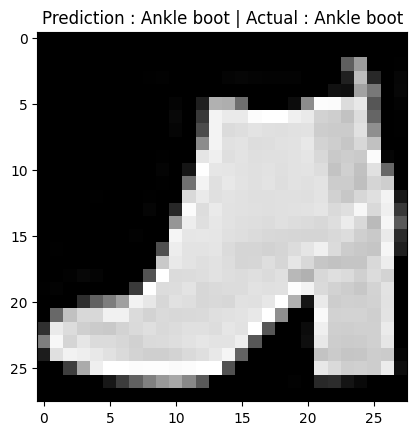

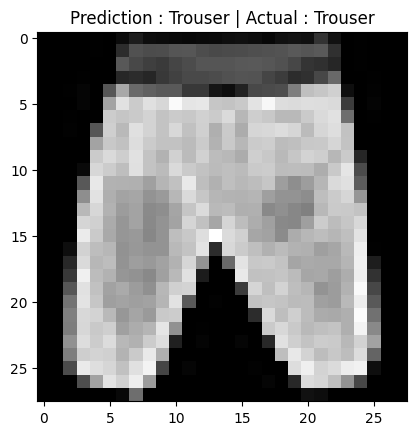

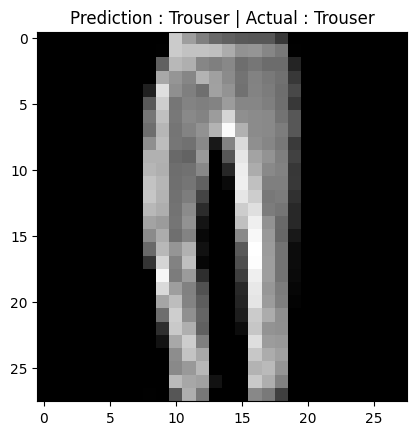

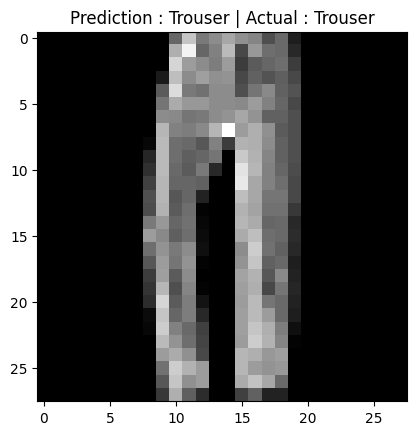

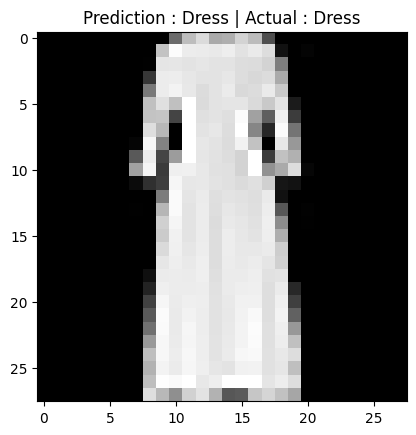

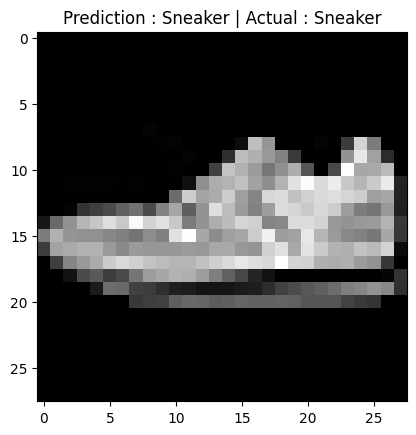

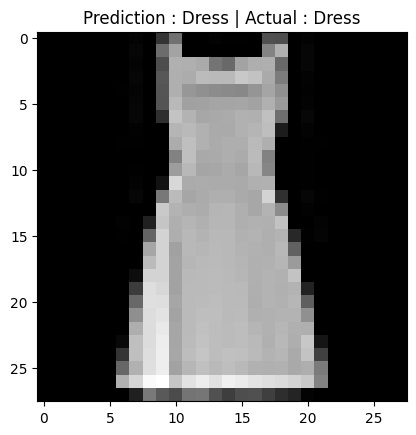

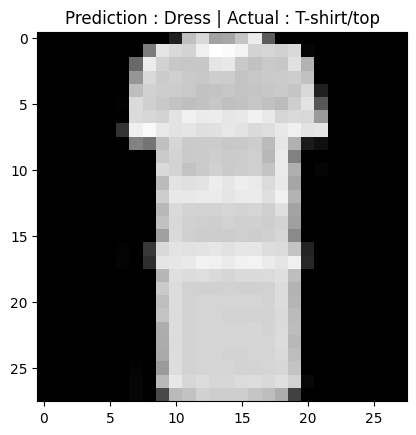

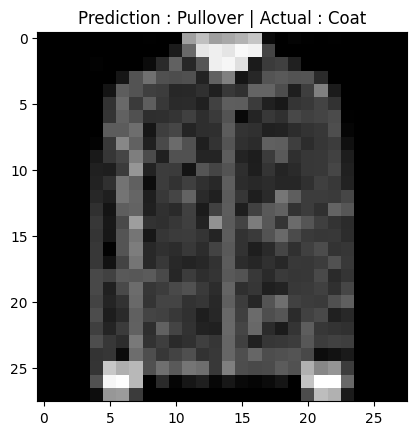

In [46]:
imgs = np.random.randint(0,10000,10)

for n in imgs:
    plt.imshow(x_test[n].reshape(28,28), cmap="gray")
    plt.title(f"Prediction : {class_names[np.argmax(preds[n])]} | Actual : {class_names[y_test[n]]}")
    plt.show()

In [1]:
class_names[np.argmax(preds[n])]

NameError: name 'class_names' is not defined

In [72]:
preds_class = np.argmax(preds, axis=1)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds_class)
print(classification_report(y_true=y_test, y_pred=preds_class))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.86      0.86      0.86      1000
           4       0.74      0.77      0.75      1000
           5       0.95      0.97      0.96      1000
           6       0.68      0.55      0.61      1000
           7       0.93      0.95      0.94      1000
           8       0.94      0.95      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [67]:
pd.DataFrame(conf_matrix, columns = class_names, index=class_names)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,806,5,20,49,13,4,98,1,4,0
Trouser,5,949,0,35,3,0,3,0,5,0
Pullover,22,4,722,15,123,0,102,1,11,0
Dress,42,10,15,854,37,0,30,0,11,1
Coat,10,2,101,45,743,0,89,0,10,0
Sandal,1,0,1,1,0,921,1,46,7,22
Shirt,168,1,109,62,125,0,510,0,24,1
Sneaker,0,0,0,0,0,28,0,926,5,41
Bag,11,0,7,11,10,9,16,4,926,6
Ankle boot,0,0,0,0,0,9,0,48,2,941


In [74]:
pd.DataFrame(conf_matrix, columns = class_names, index=class_names)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,838,5,25,31,11,4,78,1,7,0
Trouser,4,965,2,19,4,0,2,0,4,0
Pullover,19,3,789,11,104,0,63,1,10,0
Dress,40,11,17,862,32,0,28,0,9,1
Coat,4,2,109,30,767,0,80,0,8,0
Sandal,1,0,0,0,0,966,1,24,1,7
Shirt,173,5,114,35,107,0,546,0,20,0
Sneaker,0,0,0,0,0,26,0,950,1,23
Bag,5,1,3,10,7,8,6,5,951,4
Ankle boot,0,0,0,0,0,17,0,42,1,940
